In [19]:
! pip install seaborn

    today'd% |████████████████████████████████| 225kB 515kB/s ta 0:00:01


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [7]:
df = pd.read_csv("data/nepal_covid-date(22Jan-2020-05-25).csv")
district_wise_df = pd.read_csv("data/districtwise_nepalCovidData(22Jan-2020-05-25).csv")

In [8]:
df.head(2)

,date,confirmed,deaths,recovered
0,2020-1-22,0,0,0
1,2020-1-23,0,0,0


In [9]:
district_wise_df.head(2)

,district_nepali,district,confirmed,deaths,recovered
0,बाग्लुङ,baglung,2,0,2
1,बैतडी,baitadi,5,0,0


In [10]:
print(len(district_wise_df))
count_df = district_wise_df[district_wise_df["confirmed"]>=1]
r, c = count_df.shape
print("Total number of affected district: %s districts. There are actually 77 districts in Nepal." %r)

42
Total number of affected district: 42 districts. There are actually 77 districts in Nepal.


# Confirmed, Recovered and Deaths in Nepal


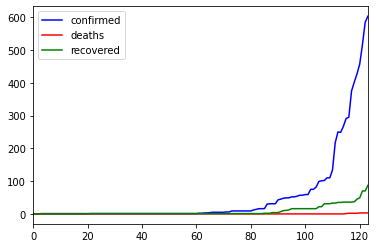

In [11]:
df.plot(color=["blue","red","green"])
plt.savefig('plots/CRD.png',bbox_inches = 'tight')
plt.show()


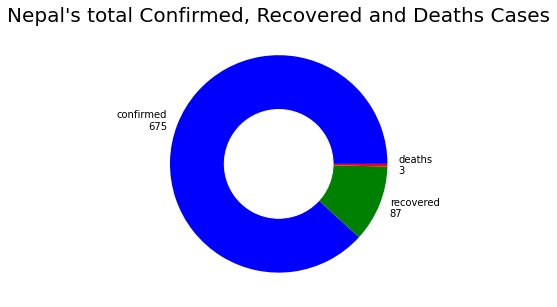

In [12]:
# district_wise_df[['confirmed','deaths','recovered']].sum().plot.bar(color=["blue","red","green"])
# plt.show()
group_size = [sum(district_wise_df['confirmed']),
              sum(district_wise_df['recovered']),
              sum(district_wise_df['deaths'])]
group_labels = ['confirmed\n' + str(sum(district_wise_df['confirmed'])),
                'recovered\n' + str(sum(district_wise_df['recovered'])),
                'deaths\n' + str(sum(district_wise_df['deaths']))]
custom_colors = ["blue","green","red"]
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title("Nepal's total Confirmed, Recovered and Deaths Cases", fontsize = 20)
plt.savefig('plots/CRD_count_pie.png',bbox_inches = 'tight')
plt.show()


# Plotting month wise

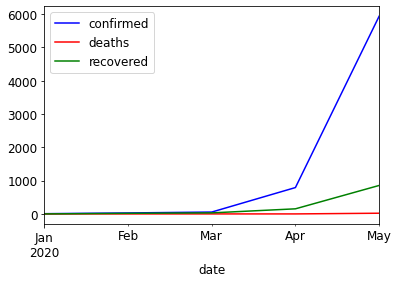

In [13]:
df['date']= pd.to_datetime(df['date']) 

months_df = df.set_index('date').groupby(pd.Grouper(freq='M')).sum()
months_df.plot(color=["blue","red","green"])
plt.savefig('plots/CRD_monthwise.png',bbox_inches = 'tight')
plt.show()


# Weekly Plotting

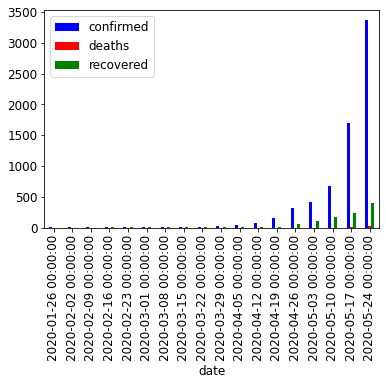

In [14]:
months_df = df.set_index('date').groupby(pd.Grouper(freq='W')).sum()
months_df.plot(kind="bar",color=["blue","red","green"])
plt.savefig('plots/CRD_weekly.png',bbox_inches = 'tight')
plt.show()


# District wise plotting


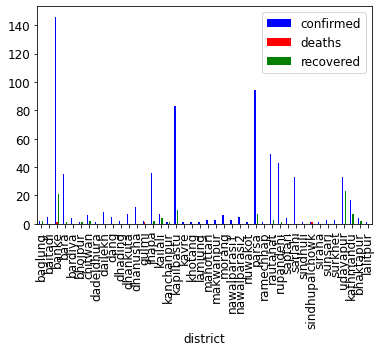

In [15]:
district_wise_df.plot(kind='bar',x='district',y=['confirmed','deaths','recovered'],color=["blue","red","green"])
plt.savefig('plots/CRD_districtwise.png',bbox_inches = 'tight')
plt.show()


# Total Confirmed Cases Statewise

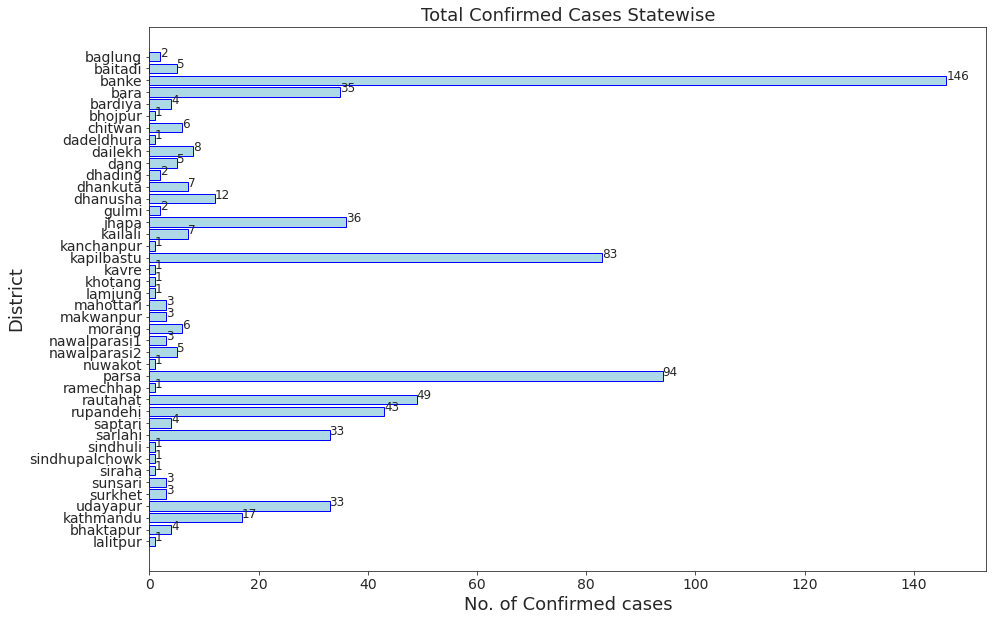

In [16]:

# district_wise_df.plot(kind='bar',x='district',y='confirmed',color="blue")
# plt.show()
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(district_wise_df["district"],district_wise_df["confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('District', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(district_wise_df["confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.savefig('plots/Confirmed_districtwise.png',bbox_inches = 'tight')
plt.show()


# Total Death Cases Statewise

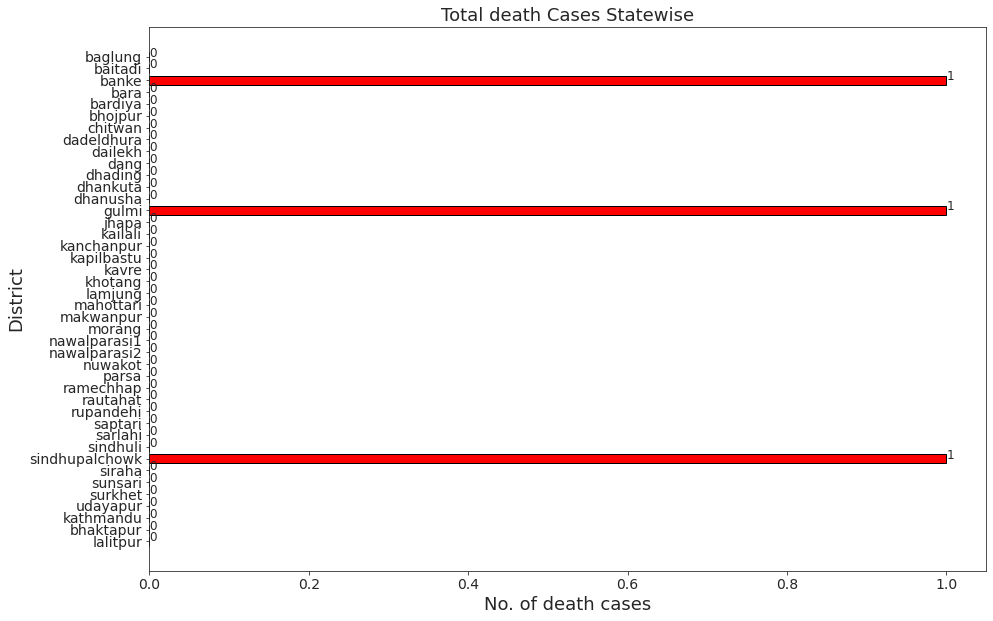

In [17]:
# district_wise_df.plot(kind='bar',x='district',y='deaths',color="red")
# plt.show()

sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(district_wise_df["district"],district_wise_df["deaths"].map(int),align = 'center', color = 'red', edgecolor = 'black')
plt.xlabel('No. of death cases', fontsize = 18)
plt.ylabel('District', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total death Cases Statewise', fontsize = 18 )
for index, value in enumerate(district_wise_df["deaths"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.savefig('plots/Deaths_districtwise.png',bbox_inches = 'tight')
plt.show()


# Total Recovered Cases Statewise

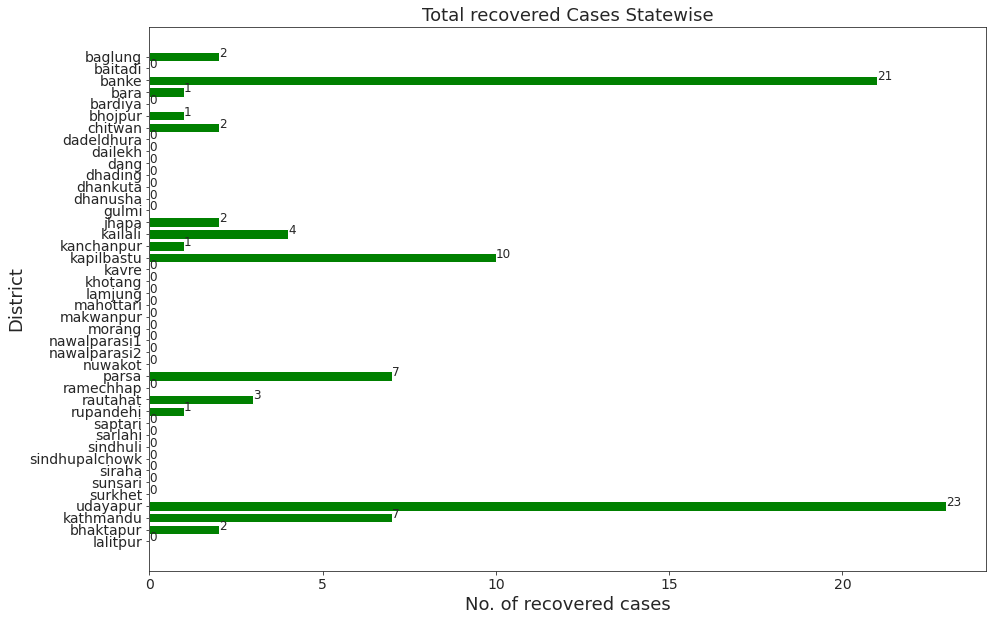

In [18]:
# district_wise_df.plot(kind='bar',x='district',y='recovered',color="green")
# plt.show()
plt.figure(figsize = (15,10))
plt.barh(district_wise_df["district"],district_wise_df["recovered"].map(int),align = 'center', color = 'green')
plt.xlabel('No. of recovered cases', fontsize = 18)
plt.ylabel('District', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total recovered Cases Statewise', fontsize = 18 )
for index, value in enumerate(district_wise_df["recovered"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.savefig('plots/Recovered_districtwise.png',bbox_inches = 'tight')
plt.show()


# TOP 10 affected district


In [19]:
top_10_confirmed = district_wise_df.sort_values('confirmed',ascending=False)[:10]
top_10_confirmed

,district_nepali,district,confirmed,deaths,recovered
2,बाँके,banke,146,1,21
27,पर्सा,parsa,94,0,7
17,कपिलवस्तु,kapilbastu,83,0,10
29,रौतहट,rautahat,49,0,3
30,रुपन्देही,rupandehi,43,0,1
14,झापा,jhapa,36,0,2
3,बारा,bara,35,0,1
32,सर्लाही,sarlahi,33,0,0
38,उदयपुर,udayapur,33,0,23
39,काठमाडौं,kathmandu,17,0,7


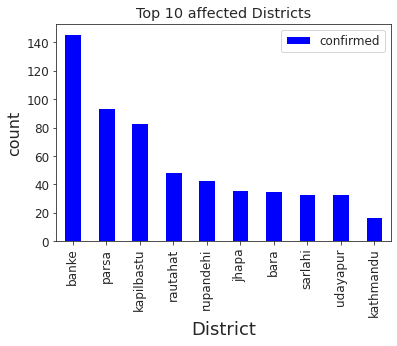

In [20]:
top_10_confirmed.plot(kind='bar',x='district',y=["confirmed"],color="blue")
plt.title('Top 10 affected Districts')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.savefig('plots/10_affectedDistrict.png',bbox_inches = 'tight')
plt.show()


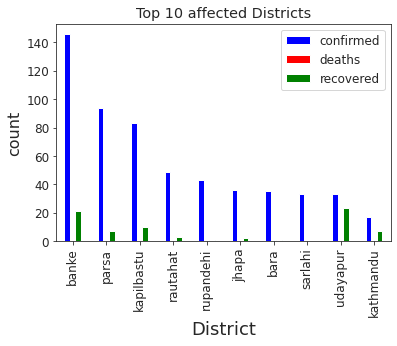

In [21]:
#comparing it with Deaths and recovered
top_10_confirmed.plot(kind='bar',x='district',y=["confirmed","deaths","recovered"],color=["blue","red","green"])
plt.title('Top 10 affected Districts')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()

# Top 10 districts with high number of Deaths


In [22]:
top_10_deaths = district_wise_df.sort_values('deaths',ascending=False)[:10]
top_10_deaths

,district_nepali,district,confirmed,deaths,recovered
2,बाँके,banke,146,1,21
34,सिन्धुपाल्चोक,sindhupalchowk,1,1,0
13,गुल्मी,gulmi,2,1,0
0,बाग्लुङ,baglung,2,0,2
31,सप्तरी,saptari,4,0,0
24,नवलपरासी (पूर्व),nawalparasi1,3,0,0
25,नवलपरासी (पश्चिम),nawalparasi2,5,0,0
26,नुवाकोट,nuwakot,1,0,0
27,पर्सा,parsa,94,0,7
28,रामेछाप,ramechhap,1,0,0


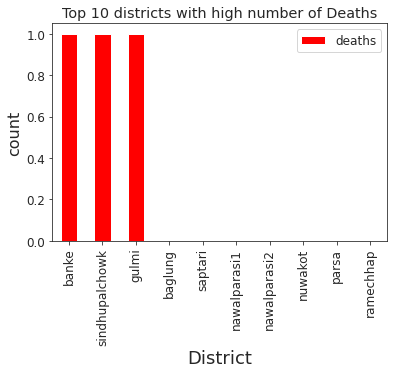

In [23]:
top_10_deaths.plot(kind='bar',x='district',y=["deaths"],color="red")
plt.title('Top 10 districts with high number of Deaths')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.savefig('plots/Deaths.png',bbox_inches = 'tight')
plt.show()


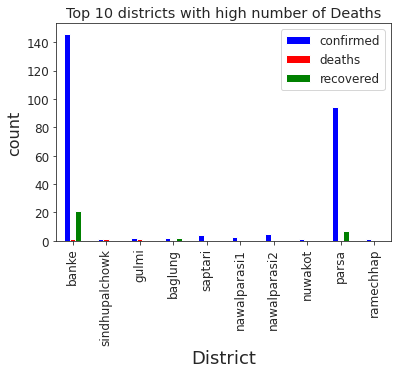

In [24]:
# comparing it with Confirmed and Recovered
top_10_deaths.plot(kind='bar',x='district',y=["confirmed","deaths","recovered"],color=["blue","red","green"])
plt.title('Top 10 districts with high number of Deaths')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()

# Top 10 Districts where max number of affected Patients recovered

In [25]:
top_10_recovered = district_wise_df.sort_values('recovered',ascending=False)[:10]
top_10_recovered

,district_nepali,district,confirmed,deaths,recovered
38,उदयपुर,udayapur,33,0,23
2,बाँके,banke,146,1,21
17,कपिलवस्तु,kapilbastu,83,0,10
39,काठमाडौं,kathmandu,17,0,7
27,पर्सा,parsa,94,0,7
15,कैलाली,kailali,7,0,4
29,रौतहट,rautahat,49,0,3
6,चितवन,chitwan,6,0,2
40,भक्तपुर,bhaktapur,4,0,2
14,झापा,jhapa,36,0,2


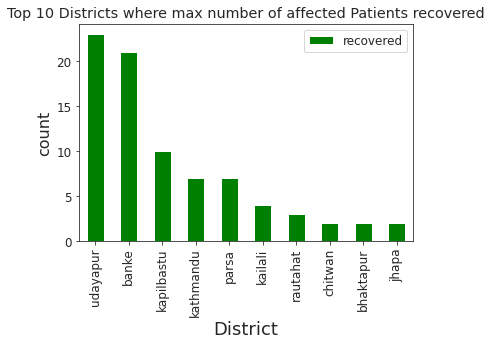

In [26]:
top_10_recovered.plot(kind='bar',x='district',y=["recovered"],color="green")
plt.title('Top 10 Districts where max number of affected Patients recovered')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.savefig('plots/10_recoveredDistrict.png',bbox_inches = 'tight')
plt.show()


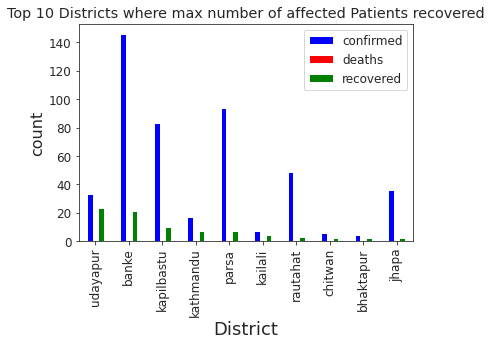

In [27]:
# comparing it with Confirmed and Deaths
top_10_recovered.plot(kind='bar',x='district',y=["confirmed","deaths","recovered"],color=["blue","red","green"])
plt.title('Top 10 Districts where max number of affected Patients recovered')
plt.xlabel('District', fontsize=18)
plt.ylabel('count', fontsize=16)
plt.show()